# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

### Solution

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

**Exploratory Data Analysis (EDA)**
First, I need to understand the given dataset, by looking for Waldo's features.

Let's first look at the datatset before any transformations

In [124]:
train_data = pd.read_json("task_1_train_data.json")
train_data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


Field sites is a complex structure, thus I need to reformat it in simpler way to analyze the field deeply.

In [125]:
# transform robust structure into simpler and more convenient array of tuples
def simplify_sites(array_of_dict):
    res = {}
    for el in array_of_dict:
        if el["site"] in res.keys():
            res[el["site"]] += el["length"]
        else:
            res[el["site"]] = el["length"]
    returned = list(zip(res.keys(), res.values()))
    return returned


#transforming it
train_data["sites"] = train_data["sites"].apply(simplify_sites)
train_data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[(bing.net, 52), (live.com, 52), (twitter.com,...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[(yahoo.com, 46), (baidu.com, 134), (wikimedia...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[(oracle.com, 335)]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[(mail.google.com, 192), (slack.com, 88), (you...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[(mail.google.com, 434), (toptal.com, 214), (o...",22:55:00,2016-07-23


Now it looks simpler after agregating all sites to one list of tuples with information about total time spent on a site in a whole session.

The target is user_id field. Since I have to classify users whereas are they Waldo or not, I need to change field, such that Waldo has positive class mark (1) and others have negative class mark (0).

In [126]:
train_data.loc[train_data['user_id'] != 0, 'user_id'] = 1
train_data['user_id'] = 1 - train_data['user_id']
train_data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,0,Russia/Moscow,"[(bing.net, 52), (live.com, 52), (twitter.com,...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,0,France/Paris,"[(yahoo.com, 46), (baidu.com, 134), (wikimedia...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,"[(oracle.com, 335)]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,"[(mail.google.com, 192), (slack.com, 88), (you...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,"[(mail.google.com, 434), (toptal.com, 214), (o...",22:55:00,2016-07-23


How many Waldo entries do I have?

In [127]:
print("Number of Waldo entries: ", train_data['user_id'].sum())
print("Total number of entries: ", train_data['user_id'].shape[0])

Number of Waldo entries:  200
Total number of entries:  40000


The dataset is totally unbalanced, I will need to balance in somehow later.

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   40000 non-null  object        
 1   os        40000 non-null  object        
 2   locale    40000 non-null  object        
 3   user_id   40000 non-null  int64         
 4   location  40000 non-null  object        
 5   sites     40000 non-null  object        
 6   time      40000 non-null  object        
 7   date      40000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.4+ MB


All fields are non-null, and in total I have 40000 entries in dataset.

Fine, now I have all features done to begin the analysis.

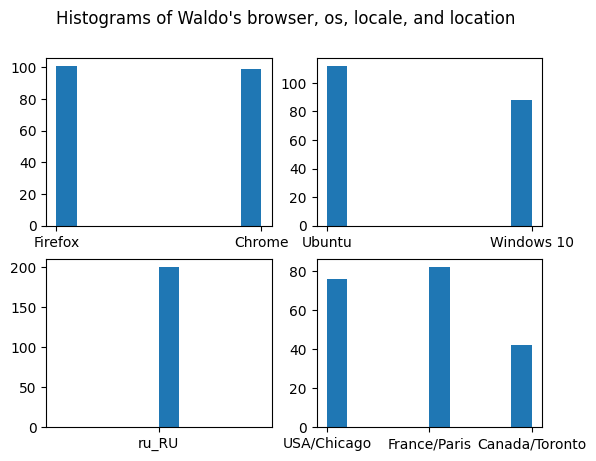

Printed values showed on histograms
browser
Firefox    101
Chrome      99
Name: count, dtype: int64
os
Ubuntu        112
Windows 10     88
Name: count, dtype: int64
locale
ru_RU    200
Name: count, dtype: int64
location
France/Paris      82
USA/Chicago       76
Canada/Toronto    42
Name: count, dtype: int64


In [129]:
# which properties does Waldo have
waldo = train_data.loc[train_data['user_id'] == 1]

fig, ax = plt.subplots(2, 2)
plt.suptitle("Histograms of Waldo's browser, os, locale, and location")
ax[0][0].hist(waldo['browser'])
ax[0][1].hist(waldo['os'])
ax[1][0].hist(waldo['locale'])
ax[1][1].hist(waldo['location'])

plt.show()

print("Printed values showed on histograms")
print(waldo['browser'].value_counts())
print(waldo['os'].value_counts())
print(waldo['locale'].value_counts())
print(waldo['location'].value_counts())

I chose 'browser', 'os', 'locale', and 'location' features for determine unique values in them. The most valuable insight is that Waldo's locale is always ru_RU. Waldo, typically uses two browsers, two OS, and he enters the network from three locations.

The question arises: is there any relationship between OS and browser or OS and location?

Let's try to catch some patterns in using certain browser on a OS from a certain location.

In [130]:
print(waldo[["os", "browser"]].groupby(by=["os", "browser"]).value_counts())

os          browser
Ubuntu      Chrome     58
            Firefox    54
Windows 10  Chrome     41
            Firefox    47
Name: count, dtype: int64


So, apparently not. Waldo choice of browser is not dependent from the OS, since it is equally distributed.

In [131]:
print(waldo[["location", "os"]].groupby(by=["location", "os"]).value_counts())

location        os        
Canada/Toronto  Ubuntu        26
                Windows 10    16
France/Paris    Ubuntu        38
                Windows 10    44
USA/Chicago     Ubuntu        48
                Windows 10    28
Name: count, dtype: int64


And again not. I have not enough data to assume the dependency between OS and location of Waldo, probably they are independent.

Let's try to analyze the time spent by Waldo on each unique site during all sessions.

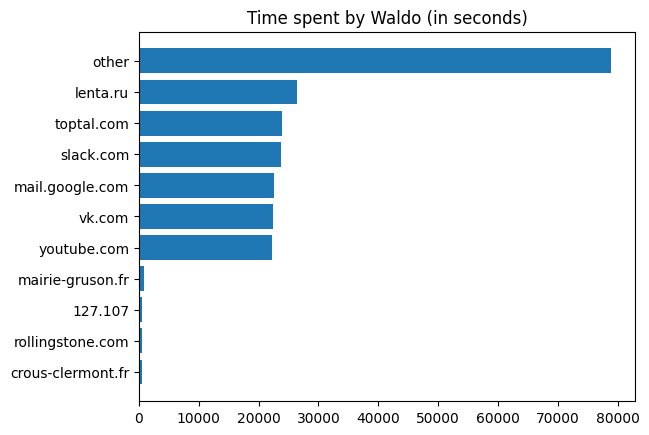

In [132]:
def find_unique_sites(user):
    """
    Function to aggregate time spent on sites.
    It simplifies the structure of a list of visited site and time spent on them;
    :param user pandas.DataFrame that has column 'sites' with an array of dictionaries site-length
    :return tuple of sites and total length spent on each of site
    """
    unique_sites = {}
    for cell in user["sites"]:
        for site, length in cell:
            if site in unique_sites.keys():
                unique_sites[site] += length
            else:
                unique_sites[site] = length
    unique_sites = list(zip(unique_sites.keys(), unique_sites.values()))
    unique_sites.sort(key= lambda x: x[1])
    unzipped_sites = [i[0] for i in unique_sites]
    unzipped_lengths = [i[1] for i in unique_sites]
    return unzipped_sites, unzipped_lengths

#plotting time spent by Waldo on top 10 most viewed sites
sites, lengths = find_unique_sites(waldo)
sites_hist = np.array(lengths[-10:])
sites_hist = np.append(sites_hist, np.sum(lengths[:-10]))
sites_labels = np.array(sites[-10:])
sites_labels = np.append(sites_labels, "other")
plt.barh(sites_labels, sites_hist)
plt.title("Time spent by Waldo (in seconds)")
plt.show()


Let's try to plot charts for Waldo in different locations. What if charts would be different?

['annonceetudiant.com', 'jeux-mini.com', 'starbucks.com', 'crous-clermont.fr', 'vk.com', 'mail.google.com', 'slack.com', 'youtube.com', 'toptal.com', 'lenta.ru']


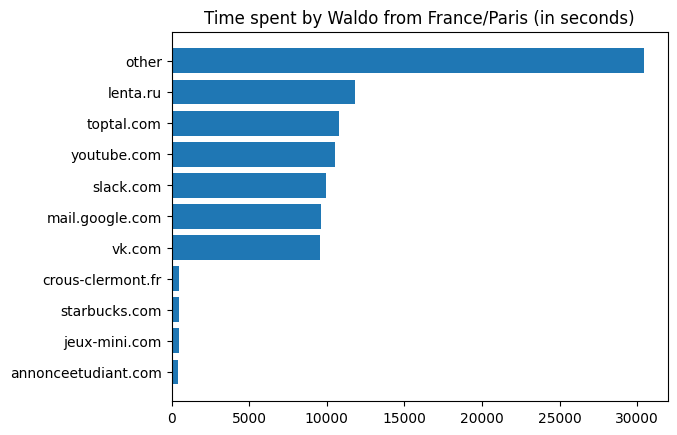

In [133]:
#plotting time spent by Waldo from France/Paris on top 10 most viewed sites
waldo_france = waldo.loc[waldo["location"] == 'France/Paris']
sites, lengths = find_unique_sites(waldo_france)
sites_hist = np.array(lengths[-10:])
sites_hist = np.append(sites_hist, np.sum(lengths[:-10]))
sites_labels = np.array(sites[-10:])
print(sites[-10:])
sites_labels = np.append(sites_labels, "other")
plt.barh(sites_labels, sites_hist)
plt.title("Time spent by Waldo from France/Paris (in seconds)")
plt.show()

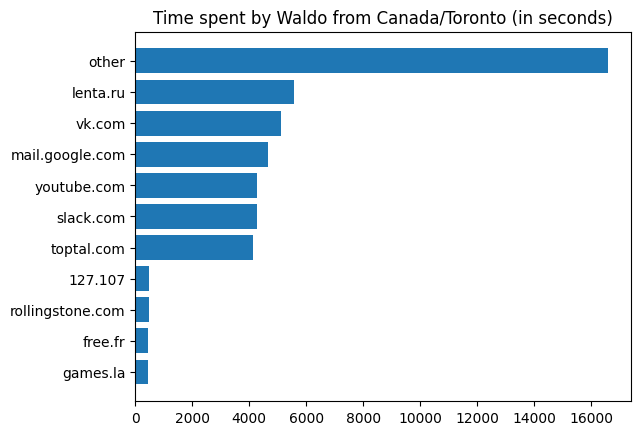

In [134]:
#plotting time spent by Waldo in Canada/Toronto on top 10 most viewed sites
waldo_canada = waldo.loc[waldo["location"] == 'Canada/Toronto']
sites, lengths = find_unique_sites(waldo_canada)
sites_hist = np.array(lengths[-10:])
sites_hist = np.append(sites_hist, np.sum(lengths[:-10]))
sites_labels = np.array(sites[-10:])
sites_labels = np.append(sites_labels, "other")
plt.barh(sites_labels, sites_hist)
plt.title("Time spent by Waldo from Canada/Toronto (in seconds)")
plt.show()

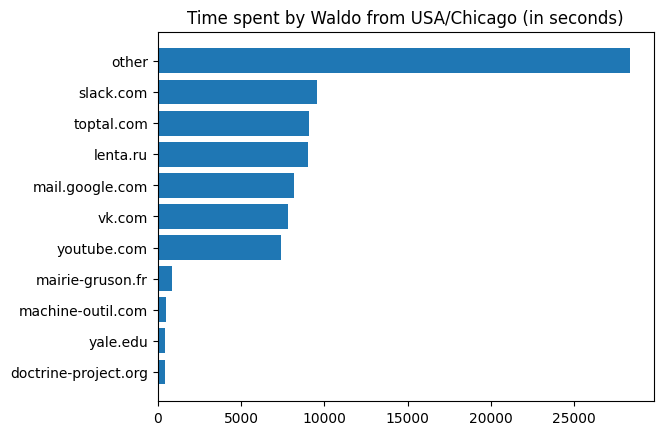

In [135]:
#plotting time spent by Waldo in USA/Chicago on top 10 most viewed sites
waldo_usa = waldo.loc[waldo["location"] == 'USA/Chicago']
sites, lengths = find_unique_sites(waldo_usa)
sites_hist = np.array(lengths[-10:])
sites_hist = np.append(sites_hist, np.sum(lengths[:-10]))
sites_labels = np.array(sites[-10:])
sites_labels = np.append(sites_labels, "other")
plt.barh(sites_labels, sites_hist)
plt.title("Time spent by Waldo from USA/Chicago (in seconds)")
plt.show()

The charts look very similar. Can I standing on them decide is a user Waldo or not?

There are six most viewed by Waldo sites. But do they make sense? Because, they probably also the most viewed sites for other users.

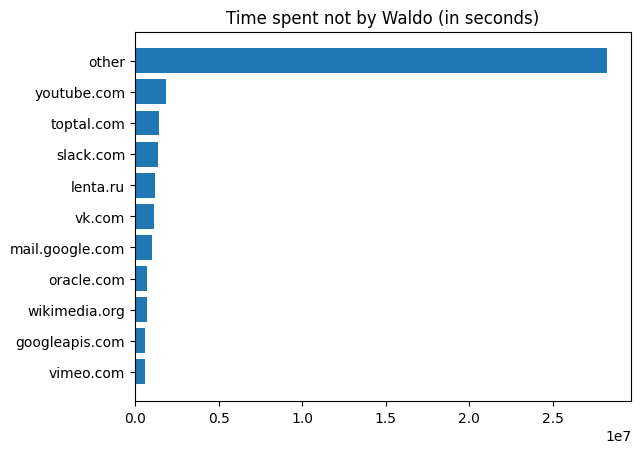

In [136]:
#plotting time spent not by Waldo on top 10 most viewed sites
non_waldo = train_data[train_data["user_id"] == 0]
sites, lengths = find_unique_sites(non_waldo)
sites_hist = np.array(lengths[-10:])
sites_hist = np.append(sites_hist, np.sum(lengths[:-10]))
sites_labels = np.array(sites[-10:])
sites_labels = np.append(sites_labels, "other")
plt.barh(sites_labels, sites_hist)
plt.title("Time spent not by Waldo (in seconds)")
plt.show()

The top most viewed sites for Waldo and not a Waldo users are similar. Many users visit popular sites as does Waldo. Thus, I cannot decide is a user Waldo looking on most viewed sites. Also, encoding those sites is a hard problem, which I avoid.
After all, field 'sites' is useless in classification and hard to encode. Therefore, I will not use this field in my model.

Start dealing with time!

I aim to determine the patterns of starting the session by Waldo from different locations.

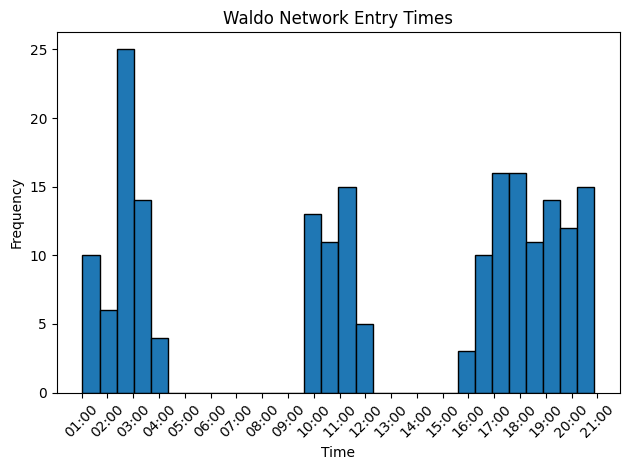

In [137]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


waldo_time = waldo["time"].apply(lambda x: datetime.strptime(x, f'%H:%M:%S'))

# Plotting Waldo's network entry time
plt.hist(waldo_time, bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Times')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis as time
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set hour interval on x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On a chart I have a histogram with three peaks! This is a good pattern, but is it all?

Let's plot histograms for Waldo in different locations.

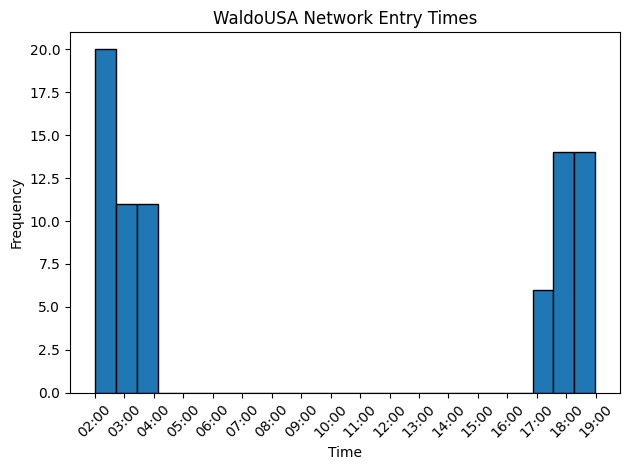

In [138]:
waldo_time_usa = waldo_usa['time'].apply(lambda x: datetime.strptime(x, f'%H:%M:%S'))

# Plotting Waldo's network entry time when he in USA
plt.hist(waldo_time_usa, bins=24, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('WaldoUSA Network Entry Times')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis as time
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set hour interval on x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

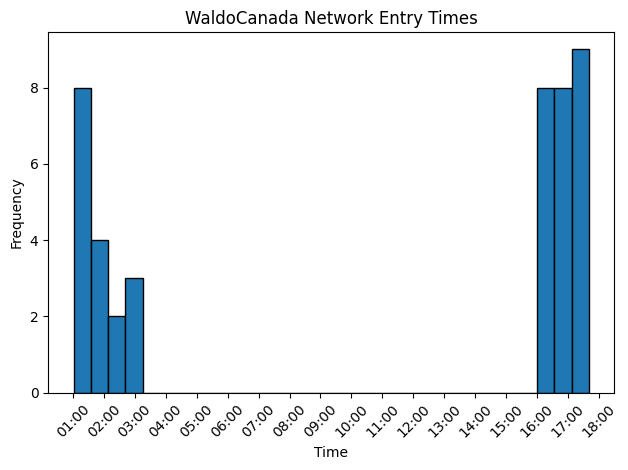

In [139]:
waldo_time_canada = waldo_canada["time"].apply(lambda x: datetime.strptime(x, f'%H:%M:%S'))

# Plotting Waldo's network entry time when he in Canada
plt.hist(waldo_time_canada, bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('WaldoCanada Network Entry Times')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis as time
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set hour interval on x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

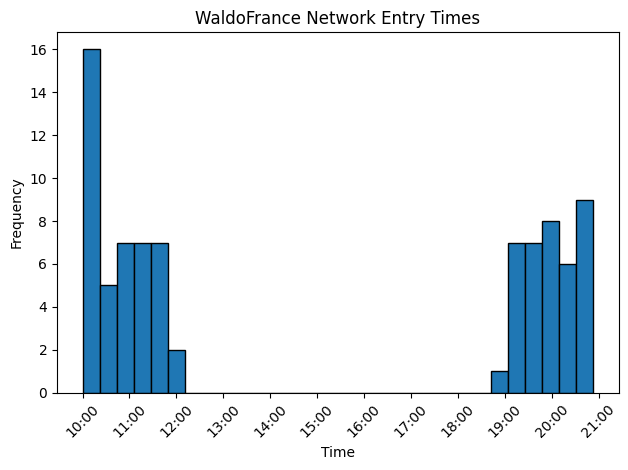

In [140]:
waldo_time_france = waldo_france["time"].apply(lambda x: datetime.strptime(x, f'%H:%M:%S'))

# Plotting Waldo's network entry time when he in France
plt.hist(waldo_time_france, bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('WaldoFrance Network Entry Times')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis as time
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set hour interval on x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hmm, Waldo in different locations have only two peaks on charts. What about local time? What if Waldo typically enters the network at the same time but in different timezones?

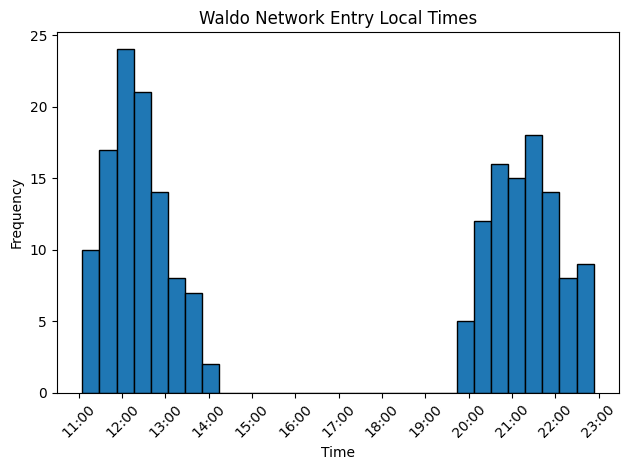

In [141]:

def get_shift(location):
    if location == "USA/Chicago":
        return timedelta(seconds=-6*3600)
    elif location == "France/Paris":
        return timedelta(seconds=2*3600)
    elif location == "Canada/Toronto":
        return timedelta(seconds=-5*3600)



local_time = waldo["time"].apply(lambda x: datetime.strptime(x, f'%H:%M:%S')) + waldo["location"].apply(get_shift)

local_time = local_time.apply(lambda x: datetime.strptime(f'{x.hour}:{x.minute}:{x.second}', f'%H:%M:%S'))

# Plotting Waldo's network entry time but localized
plt.hist(local_time, bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Local Times')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format x-axis as time
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set hour interval on x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Yes! Waldo has a schedule entering between 11 and 14 and 20 and 23 at a local time of his location.

Maybe, it works the same for the week day?

In [142]:
def convert_date_to_str(date):
    """
    Converts a datetime object to a string
    :param date: date
    :return: datetime object in string
    """
    return datetime.strftime(date, f'%Y-%m-%d')


def convert_str_to_datetime(str):
    """
    Converts a string to a datetime object
    :param str: date in string format
    :return: datetime object
    """
    return datetime.strptime(str, f'%Y-%m-%d %H:%M:%S')

# getting localized time for Waldo
waldo_date_time_utc = waldo["date"].apply(convert_date_to_str) + ' ' + waldo["time"]
waldo_date_time_utc = waldo_date_time_utc.apply(convert_str_to_datetime)

waldo_date_time_local = waldo_date_time_utc + waldo["location"].apply(get_shift)
waldo.loc[:,"loc_time"] = waldo_date_time_local


C:\Users\danil\AppData\Local\Temp\ipykernel_6476\1672831588.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waldo.loc[:,"loc_time"] = waldo_date_time_local


In [143]:
def get_weekday_from_date(date):
    """
    Getting the weekday from date
    :param date: datetime object
    :return: number of the week from 0 to 6 inclusively
    """
    x = date.weekday()
    return x

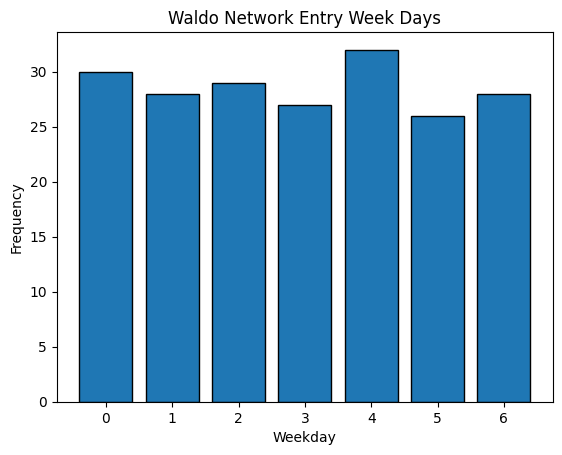

In [144]:
waldo_date = waldo_date_time_local.apply(get_weekday_from_date)
# Plotting histogram of Waldo entry weekdays
heights = waldo_date.value_counts().sort_index()
plt.bar(heights.index, heights.values, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Week Days')
plt.show()

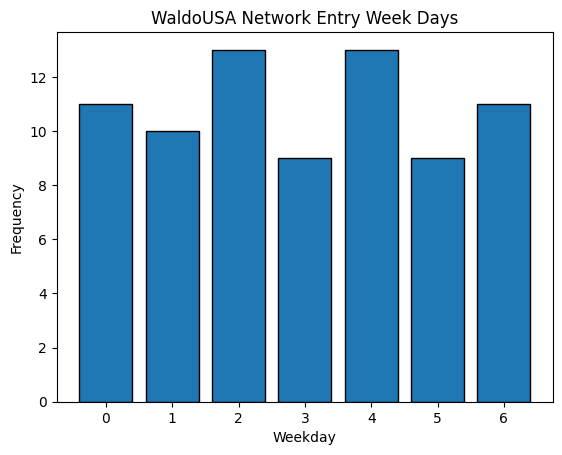

In [145]:
waldo_date_time_local_USA = waldo.loc[waldo["location"] == "USA/Chicago", "loc_time"]
waldo_date = waldo_date_time_local_USA.apply(get_weekday_from_date)
# Plotting histogram of Waldo entries weekdays for Waldo in USA
heights = waldo_date.value_counts().sort_index()
plt.bar(heights.index, heights.values, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('WaldoUSA Network Entry Week Days')
plt.show()

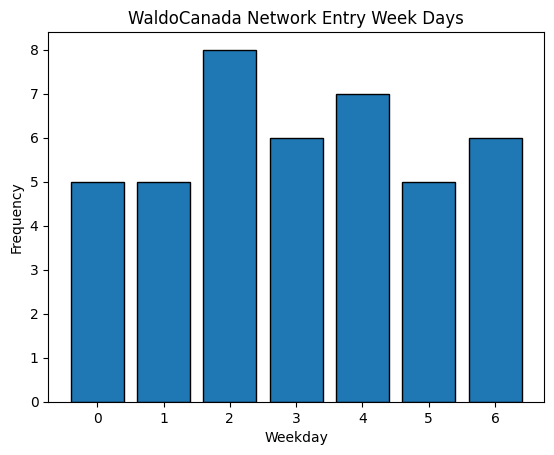

In [146]:
waldo_date_time_local_Canada = waldo.loc[waldo["location"] == "Canada/Toronto", "loc_time"]
waldo_date = waldo_date_time_local_Canada.apply(get_weekday_from_date)
# Plotting histogram of Waldo entries weekdays for Waldo in Canada
heights = waldo_date.value_counts().sort_index()
plt.bar(heights.index, heights.values, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('WaldoCanada Network Entry Week Days')
plt.show()

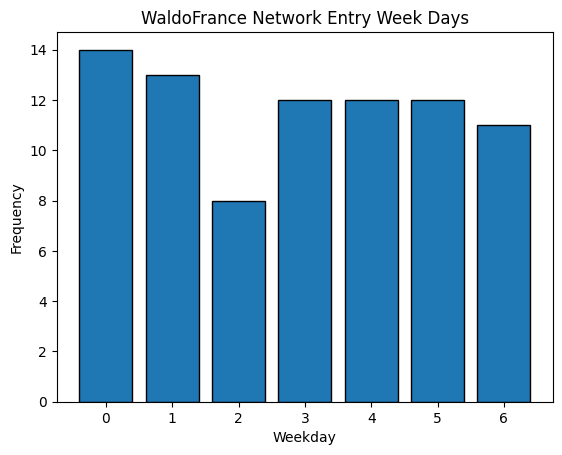

In [147]:
# Plotting histogram of Waldo entries weekdays for Waldo in France
waldo_date_time_local_France = waldo.loc[waldo["location"] == "France/Paris", "loc_time"]
waldo_date = waldo_date_time_local_France.apply(get_weekday_from_date)
heights = waldo_date.value_counts().sort_index()
plt.bar(heights.index, heights.values, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('WaldoFrance Network Entry Week Days')
plt.show()

Waldo enters the network every day equally. There are no patterns, so I cannot decide looking on this feature only.

Maybe there are pattern in month and day Waldo enters?

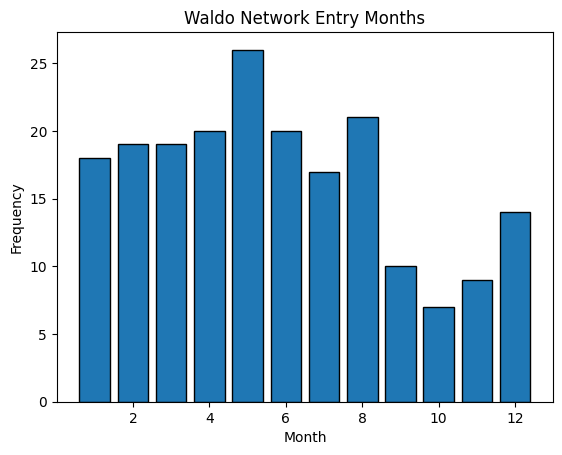

In [148]:
def get_month_from_date(date):
    x = date.month
    return x
waldo_month = waldo['date'].apply(get_month_from_date)
# Plotting histogram
heights = waldo_month.value_counts().sort_index()
plt.bar(heights.index, heights.values, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Months')
plt.show()

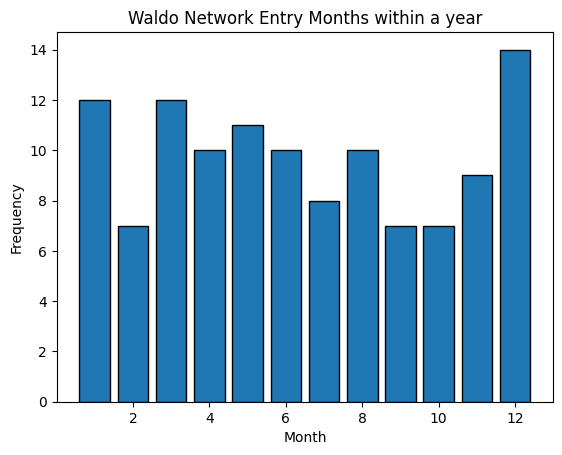

In [149]:

smallest_date = waldo['date'].min()
# Plotting histogram
waldo_within_a_year = waldo.loc[waldo["date"] < timedelta(days=365)+smallest_date]

waldo_month_within_a_year = waldo_within_a_year["date"].apply(get_month_from_date)
heights = waldo_month_within_a_year.value_counts().sort_index()
plt.bar(heights.index, heights.values, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Months within a year')
plt.show()

The date looks like it has a pattern, but this is due the time interval the dataset covers.

In [150]:
print("The earliest date in datatset: ", train_data["date"].min())
print("The latest date in datatset: ", train_data["date"].max())

The earliest date in datatset:  2016-01-14 00:00:00
The latest date in datatset:  2017-09-28 00:00:00


So dataset contains information about ~1.5 years, which is not enough to make any decision on pattern in the dataset related to year. But analyzis of the distribution of entries within a year gives me an insight that session month plays a role in finding Waldo.

Probably the day in month plays a role?

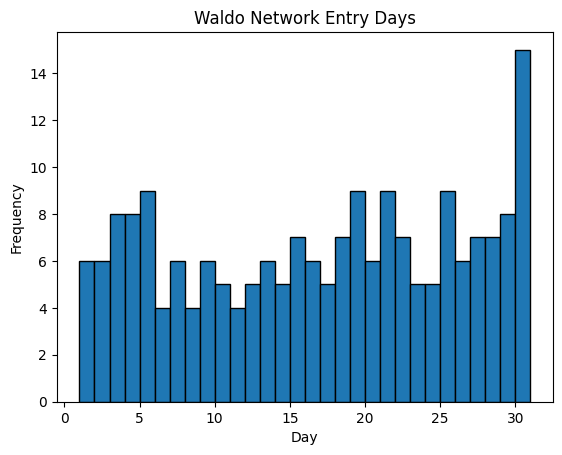

In [151]:
waldo_days_entered = waldo_date_time_local.apply(lambda x: x.day)

plt.hist(waldo_days_entered, bins=30, edgecolor='black', align='mid')  # Adjust bins as needed
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Days')
plt.show()


Looks messy, I will try to smooth the histogram.

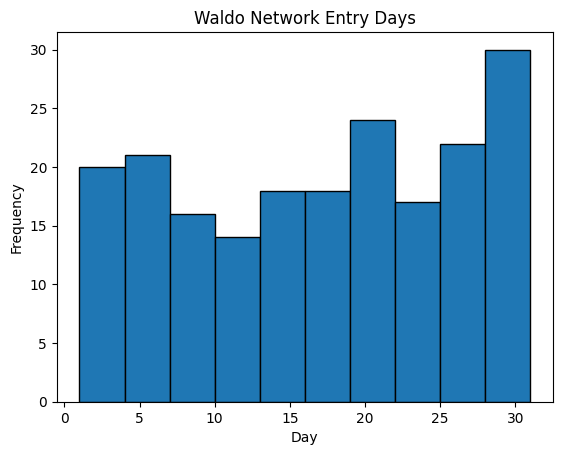

In [152]:
# heights = waldo_days_entered.value_counts().sort_index()
plt.hist(waldo_days_entered, bins=10, edgecolor='black', align='mid')  # Adjust bins as needed
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Days')
plt.show()

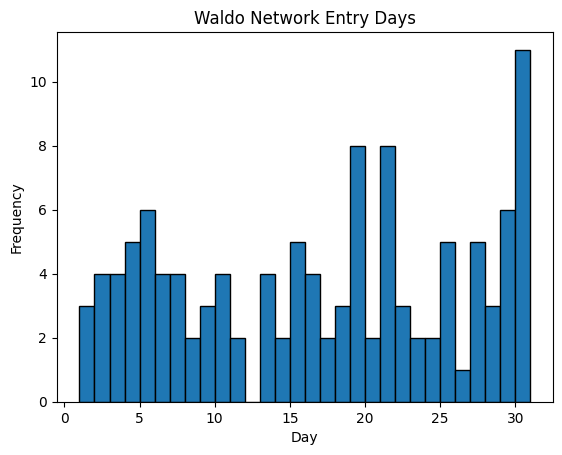

In [153]:
waldo_days_entered = waldo_date_time_local.loc[waldo_date_time_local < timedelta(days=365)+smallest_date].apply(lambda x: x.day)

plt.hist(waldo_days_entered, bins=30, edgecolor='black', align='mid')  # Adjust bins as needed
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Days')
plt.show()


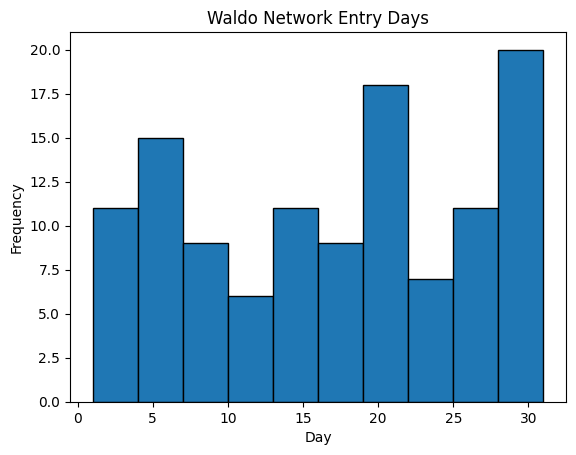

In [154]:
plt.hist(waldo_days_entered, bins=10, edgecolor='black', align='mid')  # Adjust bins as needed
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Waldo Network Entry Days')
plt.show()

Looks more understandable, I aggregated days by three. But the histogram does not provide any insight about Waldo. Thus, I will not include this feature into my model.

### Insights based on EDA

After analyzing the dataset I determined:

- The dataset is fulfilled, there are no null fields.
- The dataset is unbalanced, I have 200 Waldo out of 40000.
- I will remove 'sites', 'date' columns
- I will use 'os', 'locale', 'browser', 'location', 'time' columns as features and 'user_id' as a target.
- Waldo's 'locale' feature is always ru_RU.
- I will localize the time for each entry.

### Preprocessing

In [155]:
!pip install torchmetrics
!pip install captum

In [156]:
import pytz
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from torchmetrics import Accuracy, Precision, Recall, F1Score
from sklearn.utils import class_weight
import torch.optim as optim
from sklearn.metrics import classification_report
from captum.attr import IntegratedGradients

Initial dataset

In [157]:
train_data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,0,Russia/Moscow,"[(bing.net, 52), (live.com, 52), (twitter.com,...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,0,France/Paris,"[(yahoo.com, 46), (baidu.com, 134), (wikimedia...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,"[(oracle.com, 335)]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,"[(mail.google.com, 192), (slack.com, 88), (you...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,"[(mail.google.com, 434), (toptal.com, 214), (o...",22:55:00,2016-07-23


First, removing columns that determined to be useless in EDA stage.

In [158]:
train_data = train_data.drop(columns=["sites"])
train_data.head()

,browser,os,locale,user_id,location,time,date
0,Chrome,Debian,ur-PK,0,Russia/Moscow,04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,0,France/Paris,03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,22:55:00,2016-07-23


Getting the actual date and time in one cell

In [159]:
def merge_date_time(date_time):
  '''
  Function to merge time and date in task1 dataset
  @param date_time Series of values from two columns: date and time
  @return actual_date datetime object that contains both vlues of time and date
  '''
  time, date = date_time.loc['time'], date_time.loc['date']
  time_datetime_obj = datetime.strptime(time, f"%H:%M:%S")
  h = time_datetime_obj.hour
  m = time_datetime_obj.minute
  s = time_datetime_obj.second
  actual_date = datetime(year=date.year, month=date.month, day=date.day, hour=h, minute=m, second=s)
  return actual_date

In [160]:
timezone_from_location = {
    'Russia/Moscow': 'Europe/Moscow',
    'France/Paris': 'Europe/Paris',
    'Japan/Tokyo': 'Asia/Tokyo',
    'Australia/Sydney': 'Australia/Sydney',
    'USA/San Francisco': 'America/Los_Angeles',  # San Francisco is in the Los Angeles time zone
    'Canada/Vancouver': 'America/Vancouver',
    'UK/London': 'Europe/London',
    'Canada/Toronto': 'America/Toronto',
    'Malaysia/Kuala Lumpur': 'Asia/Kuala_Lumpur',
    'USA/Miami': 'America/New_York',  # Miami is in the New York time zone
    'Italy/Rome': 'Europe/Rome',
    'Spain/Madrid': 'Europe/Madrid',
    'USA/Chicago': 'America/Chicago',
    'Germany/Berlin': 'Europe/Berlin',
    'China/Shanghai': 'Asia/Shanghai',
    'India/Delhi': 'Asia/Kolkata',  # Delhi is in the Kolkata time zone
    'Brazil/Rio de Janeiro': 'America/Sao_Paulo',  # Rio de Janeiro is in the Sao Paulo time zone
    'Singapore/Singapore': 'Asia/Singapore',
    'Netherlands/Amsterdam': 'Europe/Amsterdam',
    'USA/New York': 'America/New_York',
    'New Zealand/Auckland': 'Pacific/Auckland'
}

In [161]:
def localize(date_location):
  """
  Time localization from UTC to a time in a given location
  """
  date = date_location.loc["act_date"]
  location = date_location.loc["location"]
  timezone = timezone_from_location[location]
  timezone = pytz.timezone(timezone)
  date = date.replace(tzinfo=pytz.utc)
  localized_date = date.astimezone(timezone)
  return localized_date, location

In [162]:
# getting full date and localize it
train_data["act_date"] = train_data[["date", "time"]].apply(merge_date_time, axis=1, result_type="reduce")
train_data[["act_date", "location"]] = train_data[["act_date", "location"]].apply(localize, axis=1, result_type='broadcast')

In [163]:
train_data.head()

,browser,os,locale,user_id,location,time,date,act_date
0,Chrome,Debian,ur-PK,0,Russia/Moscow,04:12:00,2017-06-29,2017-06-29 07:12:00+03:00
1,Firefox,Windows 8,uk-UA,0,France/Paris,03:57:00,2016-03-23,2016-03-23 04:57:00+01:00
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,05:26:00,2016-11-17,2016-11-17 14:26:00+09:00
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,00:05:00,2016-08-23,2016-08-23 10:05:00+10:00
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,22:55:00,2016-07-23,2016-07-23 15:55:00-07:00


Getting the valuable features from actual date

In [164]:
# getting features as month, day, and hour from localized date
train_data["month"] = train_data["act_date"].apply(get_month_from_date)
train_data["day"] = train_data["act_date"].apply(lambda x: x.day)
train_data["hour"] = train_data["act_date"].apply(lambda x: x.hour+x.minute/60)
train_data.head()

,browser,os,locale,user_id,location,time,date,act_date,month,day,hour
0,Chrome,Debian,ur-PK,0,Russia/Moscow,04:12:00,2017-06-29,2017-06-29 07:12:00+03:00,6,29,7.200000
1,Firefox,Windows 8,uk-UA,0,France/Paris,03:57:00,2016-03-23,2016-03-23 04:57:00+01:00,3,23,4.950000
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,05:26:00,2016-11-17,2016-11-17 14:26:00+09:00,11,17,14.433333
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,00:05:00,2016-08-23,2016-08-23 10:05:00+10:00,8,23,10.083333
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,22:55:00,2016-07-23,2016-07-23 15:55:00-07:00,7,23,15.916667


Now I can get rid of 'time_zone' and 'act_date' since I will use 'time' in minutes past 00:00 and month number.

In [165]:
train_data = train_data.drop(columns=["date", "time", "act_date"])
train_data.head()

,browser,os,locale,user_id,location,month,day,hour
0,Chrome,Debian,ur-PK,0,Russia/Moscow,6,29,7.200000
1,Firefox,Windows 8,uk-UA,0,France/Paris,3,23,4.950000
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,11,17,14.433333
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,8,23,10.083333
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,7,23,15.916667


Encoding hours, day, and month in cos, sin notation

In [166]:
# encoding non categorical features, remembering number of new non categorical features
non_cat_features_number = 6
train_data['cos_h'] = np.cos( 2* np.pi*train_data['hour']/24)
train_data['sin_h'] = np.sin( 2* np.pi*train_data['hour']/24)
train_data['cos_month'] = np.cos( 2* np.pi*train_data['month']/12)
train_data['sin_month'] = np.sin( 2* np.pi*train_data['month']/12)
train_data['cos_day'] = np.cos( 2* np.pi*train_data['day']/31)
train_data['sin_day'] = np.sin( 2* np.pi*train_data['day']/31)

In [167]:
#removing old features that I previously encoded
train_data = train_data.drop(columns=["hour", "month", "day"])

In [168]:
train_data.head()

,browser,os,locale,user_id,location,cos_h,sin_h,cos_month,sin_month,cos_day,sin_day
0,Chrome,Debian,ur-PK,0,Russia/Moscow,-0.309017,0.951057,-1.000000e+00,1.224647e-16,0.918958,-0.394356
1,Firefox,Windows 8,uk-UA,0,France/Paris,0.271440,0.962455,6.123234e-17,1.000000e+00,-0.050649,-0.998717
2,Safari,MacOS,fr-FR,0,Japan/Tokyo,-0.803857,-0.594823,8.660254e-01,-5.000000e-01,-0.954139,-0.299363
3,Chrome,Windows 8,nl-NL,0,Australia/Sydney,-0.876727,0.480989,-5.000000e-01,-8.660254e-01,-0.050649,-0.998717
4,Firefox,Ubuntu,ro-RO,0,USA/San Francisco,-0.518773,-0.854912,-8.660254e-01,-5.000000e-01,-0.050649,-0.998717


In [169]:
#separating features from targets
X, y = train_data.drop(columns=["user_id"]), train_data["user_id"]

In [170]:
# making new Series object to stratify on in train_test_split, used features ('os', 'browser', 'location')
for_stratify = X['location'].astype(str)

In [171]:
# encoding categorical features with OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X.iloc[:, :-non_cat_features_number])
transformed = pd.DataFrame(ohe.transform(X.iloc[:, :-non_cat_features_number]), columns=ohe.get_feature_names_out(X.iloc[:, :-non_cat_features_number].columns))

transformed = pd.concat([transformed, X.iloc[:, -non_cat_features_number:]], axis='columns')
feature_columns = transformed.columns
transformed.head()

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,cos_h,sin_h,cos_month,sin_month,cos_day,sin_day
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.309017,0.951057,-1.000000e+00,1.224647e-16,0.918958,-0.394356
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.271440,0.962455,6.123234e-17,1.000000e+00,-0.050649,-0.998717
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.803857,-0.594823,8.660254e-01,-5.000000e-01,-0.954139,-0.299363
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.876727,0.480989,-5.000000e-01,-8.660254e-01,-0.050649,-0.998717
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.518773,-0.854912,-8.660254e-01,-5.000000e-01,-0.050649,-0.998717


In [172]:
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.2, random_state=42, stratify=y)

In [173]:
# the sets have same proportions of classes
print(y_train.sum()/y_train.shape[0])
print(y_test.sum()/y_test.shape[0])

0.005
0.005


In [174]:
# since dataset is not balanced adding class weights for ANN training
class_weights = np.array([4, 15])
class_weights = torch.tensor(class_weights, dtype=torch.float32)

In [175]:
# converting sets to torch.tensor
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
X_train, X_test, y_train, y_test = map(torch.tensor, [X_train.values, X_test.values, y_train.values, y_test.values])

In [176]:
class FFANN(nn.Module):
  """
  Feed Forward ANN class for task 1
  """
  def __init__(self):
      super(FFANN, self).__init__()
      self.linear0 = nn.Linear(56+non_cat_features_number, 80)
      self.activation0 = nn.ReLU()
      self.linear1 = nn.Linear(80, 40)
      self.activation1 = nn.ReLU()
      self.output = nn.Linear(40, 2)

  def forward(self, x):
      x = self.linear0(x)
      x = self.activation0(x)
      x = self.linear1(x)
      x = self.activation1(x)
      x = self.output(x)
      return F.log_softmax(x, dim=1)


In [177]:
# selecting device to run on and initializing a model instance
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = FFANN().to(device)

In [178]:
print(model)

FFANN(
  (linear0): Linear(in_features=62, out_features=80, bias=True)
  (activation0): ReLU()
  (linear1): Linear(in_features=80, out_features=40, bias=True)
  (activation1): ReLU()
  (output): Linear(in_features=40, out_features=2, bias=True)
)


In [179]:
def train( model, device, train_loader, optimizer):
  """
  Train function to train a model.

  Args:
      model: Model to train.
      device: Device that is used (e.g., 'cpu' or 'cuda').
      train_loader: Train loader of the train set.
      optimizer: Optimizer chosen for the model.
  """
  model.train()
  bar = tqdm(train_loader)
  iteration = 0
  overall_loss = 0
  accuracy = Accuracy(num_classes=2, task='binary').to(device)
  precision = Precision(num_classes=2, task='binary').to(device)  # specify the number of classes
  recall = Recall(num_classes=2, task='binary').to(device)
  f1 = F1Score(num_classes=2, task='binary').to(device)
  for data, target in bar:
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(data)
      pred = output.argmax(dim=1, keepdim=True)
      accuracy.update(pred, target.view_as(pred))
      precision.update(pred, target.view_as(pred))
      recall.update(pred, target.view_as(pred))
      f1.update(pred, target.view_as(pred))

      loss = criterion(output, target)
      loss.backward()
      optimizer.step()

      iteration += 1
      overall_loss += loss.item()
      bar.set_postfix({"Loss": format(overall_loss/iteration, '.6f')})
  accuracy_value = accuracy.compute()
  precision_value = precision.compute()
  recall_value = recall.compute()
  f1_value = f1.compute()

  # Print the metric values
  print("Train metrics")
  print("-----------------------------")
  print(f'Accuracy: {accuracy_value:.4f}')
  print(f'Precision: {precision_value:.4f}')
  print(f'Recall: {recall_value:.4f}')
  print(f'F1-score: {f1_value:.4f}')
  print("-----------------------------")



In [180]:
def test(model, device, test_loader):
  """
  Test function to test a model.

  Args:
      model: Model to test.
      device: Device that is used (e.g., 'cpu' or 'cuda').
      test_loader: Test loader of the test set.
      verbose: If True, prints the test process. Default is True.

  Returns:
      Test loss.
  """
  model.eval()
  test_loss = 0
  correct = 0
  accuracy = Accuracy(num_classes=2, task='binary').to(device)
  precision = Precision(num_classes=2, task='binary').to(device)  # specify the number of classes
  recall = Recall(num_classes=2, task='binary').to(device)
  f1 = F1Score(num_classes=2, task='binary').to(device)

  with torch.no_grad():
      for data, target in test_loader:
          data, target = data.to(device), target.to(device)
          output = model(data)
          test_loss += F.nll_loss(output, target, reduction='sum').item()
          pred = output.argmax(dim=1, keepdim=True)
          accuracy.update(pred, target.view_as(pred))
          precision.update(pred, target.view_as(pred))
          recall.update(pred, target.view_as(pred))
          f1.update(pred, target.view_as(pred))
          correct += pred.eq(target.view_as(pred)).sum().item()



  accuracy_value = accuracy.compute()
  precision_value = precision.compute()
  recall_value = recall.compute()
  f1_value = f1.compute()




  test_loss /= len(test_loader.dataset)
  accuracy = 100. * correct / len(test_loader.dataset)

    # Print the metric values
  print("Test metrics")
  print("-----------------------------")
  print(f'Accuracy: {accuracy_value:.4f}')
  print(f'Precision: {precision_value:.4f}')
  print(f'Recall: {recall_value:.4f}')
  print(f'F1-score: {f1_value:.4f}')
  print("-----------------------------")

  print(f"Test set: Average loss: {test_loss}, Accuracy: {accuracy}")
  return test_loss

In [181]:
# creating datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
#batch sizes

batch_size = 32
test_batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size)

In [182]:
# initializing parameters for train and test
epochs = 200
momentum = 0.5
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=momentum)

# patience, counter, and min reached test loss for early stopping
patience = 10
counter_of_unimrooved_epochs = 0
min_test_loss = np.inf
# learning rate scheduler
scheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, min_lr=0.001)

# train loop
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer)
    test_loss = test(model, device, test_loader)
    scheduler1.step(test_loss)
    if test_loss < min_test_loss:
      counter_of_unimrooved_epochs = 0
      min_test_loss = test_loss
      torch.save(model.state_dict(), "task1.pth")
    else:
      counter_of_unimrooved_epochs += 1
    if counter_of_unimrooved_epochs > patience:
      print("Early stopping")
      model.load_state_dict(torch.load("task1.pth"))
      test(model, device, test_loader)
      break

100%|██████████| 1000/1000 [00:06<00:00, 158.20it/s, Loss=0.069535]


Train metrics
-----------------------------
Accuracy: 0.9945
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9950
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
-----------------------------
Test set: Average loss: 0.01596077614137903, Accuracy: 99.5


100%|██████████| 1000/1000 [00:05<00:00, 195.75it/s, Loss=0.030280]


Train metrics
-----------------------------
Accuracy: 0.9949
Precision: 0.4286
Recall: 0.0375
F1-score: 0.0690
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9951
Precision: 0.6667
Recall: 0.0500
F1-score: 0.0930
-----------------------------
Test set: Average loss: 0.014398191616055555, Accuracy: 99.5125


100%|██████████| 1000/1000 [00:05<00:00, 186.81it/s, Loss=0.026225]


Train metrics
-----------------------------
Accuracy: 0.9934
Precision: 0.3547
Recall: 0.3812
F1-score: 0.3675
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9954
Precision: 0.5484
Recall: 0.4250
F1-score: 0.4789
-----------------------------
Test set: Average loss: 0.012581577944656601, Accuracy: 99.5375


100%|██████████| 1000/1000 [00:05<00:00, 195.00it/s, Loss=0.022986]


Train metrics
-----------------------------
Accuracy: 0.9945
Precision: 0.4564
Recall: 0.5562
F1-score: 0.5014
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9964
Precision: 0.7200
Recall: 0.4500
F1-score: 0.5538
-----------------------------
Test set: Average loss: 0.009502880812135118, Accuracy: 99.6375


100%|██████████| 1000/1000 [00:05<00:00, 196.20it/s, Loss=0.019484]


Train metrics
-----------------------------
Accuracy: 0.9956
Precision: 0.5525
Recall: 0.6250
F1-score: 0.5865
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9970
Precision: 0.7857
Recall: 0.5500
F1-score: 0.6471
-----------------------------
Test set: Average loss: 0.008111527963137632, Accuracy: 99.7


100%|██████████| 1000/1000 [00:05<00:00, 196.54it/s, Loss=0.017555]


Train metrics
-----------------------------
Accuracy: 0.9957
Precision: 0.5538
Recall: 0.6750
F1-score: 0.6085
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9970
Precision: 0.7667
Recall: 0.5750
F1-score: 0.6571
-----------------------------
Test set: Average loss: 0.007587144045791319, Accuracy: 99.7


100%|██████████| 1000/1000 [00:05<00:00, 171.16it/s, Loss=0.016606]


Train metrics
-----------------------------
Accuracy: 0.9958
Precision: 0.5644
Recall: 0.7125
F1-score: 0.6298
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9971
Precision: 0.7742
Recall: 0.6000
F1-score: 0.6761
-----------------------------
Test set: Average loss: 0.0073410476579658735, Accuracy: 99.7125


100%|██████████| 1000/1000 [00:06<00:00, 163.83it/s, Loss=0.015736]


Train metrics
-----------------------------
Accuracy: 0.9959
Precision: 0.5707
Recall: 0.7312
F1-score: 0.6411
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9969
Precision: 0.7273
Recall: 0.6000
F1-score: 0.6575
-----------------------------
Test set: Average loss: 0.007242349651125437, Accuracy: 99.6875


100%|██████████| 1000/1000 [00:05<00:00, 181.64it/s, Loss=0.015433]


Train metrics
-----------------------------
Accuracy: 0.9960
Precision: 0.5764
Recall: 0.7312
F1-score: 0.6446
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9970
Precision: 0.7222
Recall: 0.6500
F1-score: 0.6842
-----------------------------
Test set: Average loss: 0.007092757879864166, Accuracy: 99.7


100%|██████████| 1000/1000 [00:05<00:00, 178.19it/s, Loss=0.014812]


Train metrics
-----------------------------
Accuracy: 0.9960
Precision: 0.5764
Recall: 0.7312
F1-score: 0.6446
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9966
Precision: 0.6585
Recall: 0.6750
F1-score: 0.6667
-----------------------------
Test set: Average loss: 0.0072031629793578985, Accuracy: 99.6625


100%|██████████| 1000/1000 [00:05<00:00, 174.75it/s, Loss=0.014630]


Train metrics
-----------------------------
Accuracy: 0.9958
Precision: 0.5619
Recall: 0.7375
F1-score: 0.6378
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9964
Precision: 0.6279
Recall: 0.6750
F1-score: 0.6506
-----------------------------
Test set: Average loss: 0.007374753223546179, Accuracy: 99.6375


100%|██████████| 1000/1000 [00:05<00:00, 178.88it/s, Loss=0.014144]


Train metrics
-----------------------------
Accuracy: 0.9960
Precision: 0.5728
Recall: 0.7625
F1-score: 0.6542
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9962
Precision: 0.6087
Recall: 0.7000
F1-score: 0.6512
-----------------------------
Test set: Average loss: 0.0075193582663478364, Accuracy: 99.625


100%|██████████| 1000/1000 [00:05<00:00, 170.86it/s, Loss=0.012865]


Train metrics
-----------------------------
Accuracy: 0.9964
Precision: 0.6100
Recall: 0.7625
F1-score: 0.6778
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9961
Precision: 0.5849
Recall: 0.7750
F1-score: 0.6667
-----------------------------
Test set: Average loss: 0.007822753288080122, Accuracy: 99.6125


100%|██████████| 1000/1000 [00:05<00:00, 177.68it/s, Loss=0.012266]


Train metrics
-----------------------------
Accuracy: 0.9966
Precision: 0.6275
Recall: 0.8000
F1-score: 0.7033
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9958
Precision: 0.5556
Recall: 0.7500
F1-score: 0.6383
-----------------------------
Test set: Average loss: 0.007790828929521069, Accuracy: 99.575


100%|██████████| 1000/1000 [00:05<00:00, 175.51it/s, Loss=0.012003]


Train metrics
-----------------------------
Accuracy: 0.9967
Precision: 0.6386
Recall: 0.8062
F1-score: 0.7127
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9958
Precision: 0.5556
Recall: 0.7500
F1-score: 0.6383
-----------------------------
Test set: Average loss: 0.007768539993952317, Accuracy: 99.575


100%|██████████| 1000/1000 [00:05<00:00, 179.74it/s, Loss=0.011333]


Train metrics
-----------------------------
Accuracy: 0.9967
Precision: 0.6355
Recall: 0.8062
F1-score: 0.7107
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9959
Precision: 0.5660
Recall: 0.7500
F1-score: 0.6452
-----------------------------
Test set: Average loss: 0.007741408293846235, Accuracy: 99.5875


100%|██████████| 1000/1000 [00:05<00:00, 174.17it/s, Loss=0.011131]


Train metrics
-----------------------------
Accuracy: 0.9968
Precision: 0.6439
Recall: 0.8250
F1-score: 0.7233
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9959
Precision: 0.5686
Recall: 0.7250
F1-score: 0.6374
-----------------------------
Test set: Average loss: 0.007735868459631675, Accuracy: 99.5875


100%|██████████| 1000/1000 [00:05<00:00, 176.34it/s, Loss=0.010994]


Train metrics
-----------------------------
Accuracy: 0.9969
Precision: 0.6517
Recall: 0.8188
F1-score: 0.7258
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9960
Precision: 0.5800
Recall: 0.7250
F1-score: 0.6444
-----------------------------
Test set: Average loss: 0.007735628163357823, Accuracy: 99.6


100%|██████████| 1000/1000 [00:05<00:00, 179.79it/s, Loss=0.010517]


Train metrics
-----------------------------
Accuracy: 0.9971
Precision: 0.6602
Recall: 0.8500
F1-score: 0.7432
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9962
Precision: 0.6042
Recall: 0.7250
F1-score: 0.6591
-----------------------------
Test set: Average loss: 0.007551704468660283, Accuracy: 99.625


100%|██████████| 1000/1000 [00:05<00:00, 177.98it/s, Loss=0.010431]


Train metrics
-----------------------------
Accuracy: 0.9971
Precision: 0.6650
Recall: 0.8562
F1-score: 0.7486
-----------------------------
Test metrics
-----------------------------
Accuracy: 0.9962
Precision: 0.6042
Recall: 0.7250
F1-score: 0.6591
-----------------------------
Test set: Average loss: 0.007589077163262722, Accuracy: 99.625
Early stopping
Test metrics
-----------------------------
Accuracy: 0.9970
Precision: 0.7222
Recall: 0.6500
F1-score: 0.6842
-----------------------------
Test set: Average loss: 0.007092757879864166, Accuracy: 99.7


Classification report

In [183]:
y_pred = torch.empty((0, 1), dtype=torch.int64).to(device)
model.eval()
with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            y_pred = torch.cat((y_pred, pred), 0)

y_pred = y_pred.cpu().numpy()

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7960
           1       0.72      0.65      0.68        40

    accuracy                           1.00      8000
   macro avg       0.86      0.82      0.84      8000
weighted avg       1.00      1.00      1.00      8000



In [185]:
model.eval()
# getting the feature importance
ig = IntegratedGradients(model)
batch_size = 40
tst = transformed
tst = torch.tensor(tst.values, dtype=torch.float).to(device)
baseline = torch.zeros_like(tst).to(device)
# Compute attributions in batches
attributions = []
for i in range(0, len(tst), batch_size):
    batch_inputs = tst[i:i+batch_size]
    batch_baseline = baseline[i:i+batch_size]
    batch_attributions = ig.attribute(batch_inputs, batch_baseline, target=1)
    attributions.append(batch_attributions)

# Concatenate the attributions from all batches
attributions = torch.cat(attributions, dim=0)

print(attributions)

tensor([[-1.3157e+00, -0.0000e+00, -0.0000e+00,  ...,  2.4804e-16,
         -5.3758e-01, -2.2588e-01],
        [-0.0000e+00, -1.5308e+00, -0.0000e+00,  ...,  1.2183e+00,
          1.7800e-02, -5.4123e-01],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00,  ..., -8.3507e-01,
          2.4327e-01, -5.1250e-02],
        ...,
        [-0.0000e+00, -0.0000e+00, -0.0000e+00,  ..., -1.0301e+00,
         -3.3676e-01, -3.2164e-01],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00,  ...,  8.6709e-01,
          1.4665e-02,  2.7888e-02],
        [-0.0000e+00, -1.0790e+00, -0.0000e+00,  ...,  1.2837e+00,
         -1.4890e-02,  1.1676e-02]], dtype=torch.float64)


In [186]:
importn = abs(attributions.mean(axis=0).cpu().numpy())
importn /= max(importn)
a = pd.Series(importn, index=feature_columns)
print(a.sort_values(ascending=False)[:30])

sin_h                             1.000000
cos_month                         0.192875
browser_Chrome                    0.186795
os_Windows 8                      0.163017
locale_ru_RU                      0.157068
browser_Safari                    0.153391
os_MacOS                          0.142645
browser_Firefox                   0.138935
location_Canada/Toronto           0.097160
browser_Internet Explorer         0.083331
os_Windows 7                      0.056134
os_Windows 10                     0.055438
locale_uk-UA                      0.053210
locale_ur-PK                      0.052078
location_New Zealand/Auckland     0.043388
location_Germany/Berlin           0.041036
os_Debian                         0.038298
location_Canada/Vancouver         0.037277
locale_pt-BR                      0.037010
sin_month                         0.035293
os_Ubuntu                         0.034045
locale_en-SG                      0.032405
location_India/Delhi              0.029344
location_Si

The features importance slightly allign with my EDA stage, however not perfectly. Some features I mentioned as time, date, browser and OS are present in top 30 most important features, but others do not. All this had happened, since I tried to generalize my model and increase its f1 score. In my try when I played with class weights my model had metrics recall 1, but precision 0.25 and top features to predict Waldo perfectly alligned with my EDA.

The importance reveals that Waldo was typically determined by the time he entered, browser Chrome if unknown user used it, and month and locale ru_RU. Other features are present due to my aim to maximize f1 score.

In [187]:
test(model, device, test_loader)

Test metrics
-----------------------------
Accuracy: 0.9970
Precision: 0.7222
Recall: 0.6500
F1-score: 0.6842
-----------------------------
Test set: Average loss: 0.007092757879864166, Accuracy: 99.7


0.007092757879864166

### Making predictions using the trained model

Repeat all steps to preprocess the data as for training

In [188]:
hidden_set = pd.read_json("task_1_verify.json")
hidden_set.head()

,browser,os,locale,location,sites,time,date
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19


In [189]:
hidden_set["act_date"] = hidden_set[["date", "time"]].apply(merge_date_time, axis=1, result_type="reduce")
hidden_set[["act_date", "location"]] = hidden_set[["act_date", "location"]].apply(localize, axis=1, result_type="broadcast")

In [190]:
hidden_set["month"] = hidden_set["act_date"].apply(get_month_from_date)
hidden_set["day"] = hidden_set["act_date"].apply(lambda x: x.day)
hidden_set["hour"] = hidden_set["act_date"].apply(lambda x: x.hour + x.minute/60)
hidden_set = hidden_set.drop(columns=["sites", "date", "time"])

In [191]:
hidden_set.head()

,browser,os,locale,location,act_date,month,day,hour
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,2016-11-05 15:13:00+01:00,11,5,15.216667
1,Chrome,Windows 10,ja-JP,Germany/Berlin,2017-02-22 22:06:00+01:00,2,22,22.100000
2,Chrome,Windows 10,it-IT,Singapore/Singapore,2016-01-30 21:17:00+08:00,1,30,21.283333
3,Chrome,Windows 10,ur-PK,UK/London,2017-02-27 17:00:00+00:00,2,27,17.000000
4,Firefox,Ubuntu,en-CA,Russia/Moscow,2017-04-19 21:11:00+03:00,4,19,21.183333


In [192]:
hidden_set = hidden_set.drop(columns=["act_date"])

In [193]:
hidden_set['cos_h'] = np.cos( 2* np.pi*hidden_set['hour']/24)
hidden_set['sin_h'] = np.sin( 2* np.pi*hidden_set['hour']/24)
hidden_set['cos_month'] = np.cos( 2* np.pi*hidden_set['month']/12)
hidden_set['sin_month'] = np.sin( 2* np.pi*hidden_set['month']/12)
hidden_set['cos_day'] = np.cos( 2* np.pi*hidden_set['day']/31)
hidden_set['sin_day'] = np.sin( 2* np.pi*hidden_set['day']/31)
hidden_set.head()

,browser,os,locale,location,month,day,hour,cos_h,sin_h,cos_month,sin_month,cos_day,sin_day
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,11,5,15.216667,-0.665882,-0.746057,0.866025,-0.500000,0.528964,0.848644
1,Chrome,Windows 10,ja-JP,Germany/Berlin,2,22,22.100000,0.878817,-0.477159,0.500000,0.866025,-0.250653,-0.968077
2,Chrome,Windows 10,it-IT,Singapore/Singapore,1,30,21.283333,0.757565,-0.652760,0.866025,0.500000,0.979530,-0.201299
3,Chrome,Windows 10,ur-PK,UK/London,2,27,17.000000,-0.258819,-0.965926,0.500000,0.866025,0.688967,-0.724793
4,Firefox,Ubuntu,en-CA,Russia/Moscow,4,19,21.183333,0.740218,-0.672367,-0.500000,0.866025,-0.758758,-0.651372


In [194]:
hidden_set = hidden_set.drop(columns=["month", "day", "hour"])

In [195]:
validation_set = pd.DataFrame(ohe.transform(hidden_set.iloc[:, :-non_cat_features_number]), columns=ohe.get_feature_names_out(hidden_set.iloc[:, :-non_cat_features_number].columns))
validation_set = pd.concat([validation_set, hidden_set.iloc[:, -non_cat_features_number:]], axis='columns')
validation_set.head()

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,cos_h,sin_h,cos_month,sin_month,cos_day,sin_day
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.665882,-0.746057,0.866025,-0.500000,0.528964,0.848644
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.878817,-0.477159,0.500000,0.866025,-0.250653,-0.968077
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.757565,-0.652760,0.866025,0.500000,0.979530,-0.201299
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.258819,-0.965926,0.500000,0.866025,0.688967,-0.724793
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.740218,-0.672367,-0.500000,0.866025,-0.758758,-0.651372


In [196]:
validation_set = validation_set.astype('float32')

In [197]:
validation_set = torch.tensor(validation_set.values)

In [198]:
val_dataset = TensorDataset(validation_set)

# Create data loaders
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [199]:
def make_predictions(model, device, validation_loader):
    """
    Function to predict users in validation set.

    Args:
        model: Model to make predictions on.
        device: Device which is used (e.g., 'cpu' or 'cuda').
        validation_loader: The loader used for data.
    Returns:
        predictions
    """
    model.eval()
    result = torch.empty((0, 1), dtype=torch.int64).to(device)
    with torch.no_grad():
        for data in validation_loader:
            data = data[0].to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            result = torch.cat((result, pred), 0)
    return result

In [200]:
predicted = make_predictions(model, device, val_loader).cpu().numpy()

In [201]:
predicted.sum()

172

172 entries were classified as Waldo's entries

In [202]:
import json
with open('task_1_verify.json', 'r') as file:
    data = json.load(file)

# Loop through each entry in the array and add the new field
idx = 0
for entry in data:
    entry["is_waldo"] = bool(predicted[idx])
    idx += 1

# Write the updated data back to the JSON file
with open('task_1_verify.json', 'w') as file:
    json.dump(data, file, indent=4)